<a href="https://colab.research.google.com/github/SofiNurul/SKRIPSI/blob/main/AnalisisSentiment_Produk_Penghilang_Bekas_Luka_Menggunakan_Naive_BayesSMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords as nltk_stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support
from imblearn.over_sampling import SMOTE
from wordcloud import WordCloud
import joblib

Mengunduh resource nltk yang diperlukan

In [38]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Muat dataset

In [39]:
df = pd.read_csv('Datalatih_sentiment_shopee.csv', encoding='MacRoman')

Daftar stopwords dari NLTK dan tambahan khusus Bahasa Indonesia

In [40]:
stopwords_tambahan = list([
    'gk', 'yg', 'nya', 'dan', 'dll', 'saja', 'juga', 'untuk', 'dengan', 'atau',
    'tapi', 'karena', 'seperti', 'yang', 'saya', 'ga', 'malah', 'tidak', 'lagi',
    'ini', 'di', 'kok', 'aja', 'gak', 'jadi', 'ya', 'dah', 'bisa', 'ada', 'bgt',
    'banget', 'kak', 'ituu', 'grgr', 'jd', 'pengen', 'dgn', 'udah', 'klo', 'tp',
    'pa', 'udh', 'karin', 'bgtt', 'ig', 'po', 'tau', 'utk', 'karna', 'brangnya',
    'ngk', 'kyk', 'sy', 'tp', 'uda', 'nga', 'dngn', 'kalo', 'gamau', 'becak', 'kya',
    'sma', 'jdi', 'ad', 'lg', 'pa', 'huhu', 'dpt', 'gel', 'b', 'jg', 'rb', 'hehe',
    'pdhl', 'dr', 'ku', 'sih', 'ka', 'kyk', 'sy', 'bli', 'skali', 'dikrim', 'berharap',
    'kirim', 'jdi', 'pkai', 'penjual', 'brangnya', 'becak', 'tpi', 'blum', 'bgin','akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara',
    'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal',
    'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan',
    'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya',
    'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini',
    'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja',
    'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir',
    'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal',
    'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali',
    'berkata', 'berkehendak', 'berkeinginan', 'berkenaan', 'berlainan', 'berlalu', 'berlangsung',
    'berlebihan', 'bermacam', 'bermacam-macam', 'bermaksud', 'bermula', 'bersama', 'bersama-sama',
    'bersiap', 'bersiap-siap', 'bertanya', 'bertanya-tanya', 'berturut', 'berturut-turut', 'bertutur',
    'berujar', 'berupa', 'besar', 'betul', 'betulkah', 'biasa', 'biasanya', 'bila', 'bilakah', 'bisa',
    'bisakah', 'boleh', 'bolehkah', 'bolehlah', 'buat', 'bukan', 'bukankah', 'bukanlah', 'bukannya',
    'bulan', 'bung', 'cara', 'caranya', 'cukup', 'cukupkah', 'cukuplah', 'cuma', 'dahulu', 'dalam',
    'dan', 'dapat', 'dari', 'daripada', 'datang', 'dekat', 'demi', 'demikian', 'demikianlah', 'dengan',
    'depan', 'di', 'dia', 'diakhiri', 'diakhirinya', 'dialah', 'diantara', 'diantaranya', 'diberi',
    'diberikan', 'diberikannya', 'dibuat', 'dibuatnya', 'didapat', 'didatangkan', 'digunakan',
    'diibaratkan', 'diibaratkannya', 'diingat', 'diingatkan', 'diinginkan', 'dijawab', 'dijelaskan',
    'dijelaskannya', 'dikarenakan', 'dikatakan', 'dikatakannya', 'dikerjakan', 'diketahui',
    'diketahuinya', 'dikira', 'dilakukan', 'dilalui', 'dilihat', 'dimaksud', 'dimaksudkan',
    'dimaksudkannya', 'dimaksudnya', 'diminta', 'dimintai', 'dimisalkan', 'dimulai', 'dimulailah',
    'dimulainya', 'dimungkinkan', 'dini', 'dipastikan', 'diperbuat', 'diperbuatnya', 'dipergunakan',
    'diperkirakan', 'diperlihatkan', 'diperlukan', 'diperlukannya', 'dipersoalkan', 'dipertanyakan',
    'dipunyai', 'diri', 'dirinya', 'disampaikan', 'disebut', 'disebutkan', 'disebutkannya', 'disini',
    'disinilah', 'ditambahkan', 'ditandaskan', 'ditanya', 'ditanyai', 'ditanyakan', 'ditegaskan',
    'ditujukan', 'ditunjuk', 'ditunjuki', 'ditunjukkan', 'ditunjukkannya', 'ditunjuknya', 'dituturkan',
    'dituturkannya', 'diucapkan', 'diucapkannya', 'diungkapkan', 'dong', 'dua', 'dulu', 'empat', 'enggak',
    'enggaknya', 'entah', 'entahlah', 'guna', 'gunakan', 'hal', 'hampir', 'hanya', 'hanyalah', 'hari',
    'harus', 'haruslah', 'harusnya', 'hendak', 'hendaklah', 'hendaknya', 'hingga', 'ia', 'ialah', 'ibarat',
    'ibaratkan', 'ibaratnya', 'ibu', 'ikut', 'ingat', 'ingat-ingat', 'ingin', 'inginkah', 'inginkan', 'ini',
    'inikah', 'inilah', 'itu', 'itukah', 'itulah', 'jadi', 'jadilah', 'jadinya', 'jangan', 'jangankan',
    'janganlah', 'jauh', 'jawab', 'jawaban', 'jawabnya', 'jelas', 'jelaskan', 'jelaslah', 'jelasnya',
    'jika', 'jikalau', 'juga', 'jumlah', 'jumlahnya', 'justru', 'kala', 'kalau', 'kalaulah', 'kalaupun',
    'kalian', 'kami', 'kamilah', 'kamu', 'kamulah', 'kan', 'kapan', 'kapankah', 'kapanpun', 'karena',
    'karenanya', 'kasus', 'kata', 'katakan', 'katakanlah', 'katanya', 'ke', 'keadaan', 'kebetulan',
    'kecil', 'kedua', 'keduanya', 'keinginan', 'kelamaan', 'kelihatan', 'kelihatannya', 'kelima', 'keluar',
    'kembali', 'kemudian', 'kemungkinan', 'kemungkinannya', 'kenapa', 'kepada', 'kepadanya', 'kesampaian',
    'keseluruhan', 'keseluruhannya', 'keterlaluan', 'ketika', 'khususnya', 'kini', 'kinilah', 'kira',
    'kira-kira', 'kiranya', 'kita', 'kitalah', 'kok', 'kurang', 'lagi', 'lagian', 'lah', 'lain', 'lainnya',
    'lalu', 'lama', 'lamanya', 'lanjut', 'lanjutnya', 'lebih', 'lewat', 'lima', 'luar', 'macam', 'maka',
    'makanya', 'makin', 'malah', 'malahan', 'mampu', 'mampukah', 'mana', 'manakala', 'manalagi', 'masa',
    'masalah', 'masalahnya', 'masih', 'masihkah', 'masing', 'masing-masing', 'mau', 'maupun', 'melainkan',
    'melakukan', 'melalui', 'melihat', 'melihatnya', 'memang', 'memastikan', 'memberi', 'memberikan',
    'membuat', 'memerlukan', 'memihak', 'meminta', 'memintakan', 'memisalkan', 'memperbuat', 'mempergunakan',
    'memperkirakan', 'memperlihatkan', 'mempersiapkan', 'mempersoalkan', 'mempertanyakan', 'mempunyai',
    'memulai', 'memungkinkan', 'menaiki', 'menambahkan', 'menandaskan', 'menanti', 'menanti-nanti',
    'menantikan', 'menanya', 'menanyai', 'menanyakan', 'mendapat', 'mendapatkan', 'mendatang', 'mendatangi',
    'mendatangkan', 'menegaskan', 'mengakhiri', 'mengapa', 'mengatakan', 'mengatakannya', 'mengenai',
    'mengerjakan', 'mengetahui', 'menggunakan', 'menghendaki', 'mengibaratkan', 'mengibaratkannya', 'mengingat',
    'mengingatkan'
])

Inisialisasi Lemmatizer

In [41]:
lemmatizer = WordNetLemmatizer()

Fungsi untuk membersihkan teks

In [42]:
def bersihkan_teks(teks):
    if not isinstance(teks, str):
        return ""
    teks = teks.lower()
    teks = re.sub(r'http\S+|www\S+|https\S+', '', teks)
    teks = re.sub(r'[^\x00-\x7F]+', ' ', teks)
    teks = teks.translate(str.maketrans('', '', string.punctuation))
    teks = re.sub(r'\d+', '', teks)
    kata_kata = teks.split()
    teks_bersih = ' '.join([lemmatizer.lemmatize(kata) for kata in kata_kata if kata not in stopwords_tambahan])
    return teks_bersih

Terapkan fungsi pembersihan pada kolom 'content'

In [43]:
df['cleaned_content'] = df['content'].apply(bersihkan_teks)

Tampilkan sebagian kecil dari teks yang sudah dibersihkan untuk memastikan hasilnya

In [44]:
print("Contoh teks setelah pembersihan:")
print(df['cleaned_content'].head(10))

Contoh teks setelah pembersihan:
0    pertama kali coba baca ulasan quora bagus semo...
1    penasaran laser bekas luka ilang nemu produk c...
2    pke kali semoga bermanfaat makasih seller harg...
3                                        mudahan cocok
4                                barang sesuai pesanan
5    pertama kali coba mudah mudahan pudar bekas ke...
6    nyoba semoga manjur menghilangkan bekas luka k...
7    cottonbud dikasih pelit gimana pake sumpah kal...
8    alhamdulillah paketku sudah sampai pesanannya ...
9    dikasih thr sama kakaknya masyaallah berkah se...
Name: cleaned_content, dtype: object


Kamus subjektivitas dengan kategori intensitas dan polaritas emosional

In [45]:
# Definisikan daftar kata-kata positif dan negatif berdasarkan kamus subjektivitas yang merujuk pada buku 'pengantar metode analisis sentimen'
positif = [
    'pembebasan', 'penghargaan', 'altruistik', 'luar biasa', 'hebat', 'inspiratif', 'bagus',
    'puas', 'baik', 'suka', 'keren', 'bagus sekali', 'cepat', 'efektif', 'cocok', 'manjur',
    'ampuh', 'berhasil', 'kepuasan', 'kekaguman', 'gembira', 'menerima', 'berlimpah', 'makmur',
    'aliansi', 'kondusif', 'sederhana', 'semoga', 'semoga cocok', 'bahagia', 'senang', 'syukur',
    'bersemangat', 'lega', 'bangga', 'optimis', 'prestasi', 'pencapaian', 'menang', 'berkembang',
    'memperbaiki', 'produktif', 'menghargai', 'mengagumi', 'mendukung', 'percaya', 'mencintai',
    'memuji', 'setia', 'nyaman', 'damai', 'tenteram', 'harmonis', 'berkelimpahan', 'dermawan',
    'empati', 'peduli', 'ramah', 'murah hati', 'kebebasan', 'keterbukaan', 'kesempatan', 'harapan',
    'stabil', 'terjamin', 'tenang', 'penyelesaian', 'penyembuhan', 'pemulihan', 'penanggulangan',
    'solusi', 'peningkatan', 'sukses', 'berhasil', 'penuh kasih', 'inovasi', 'berkat', 'semoga berhasil'
]

negatif = [
    'pelecehan', 'kekejian', 'ketakutan', 'kekhawatiran', 'penindasan', 'frustrasi', 'buruk',
    'tidak puas', 'jelek', 'kecewa', 'payah', 'lambat', 'rusak', 'kotor', 'gagal', 'mengecewakan',
    'mahal', 'pecah', 'cuek', 'jutek', 'penyok', 'sampah', 'pelit', 'kurang', 'tidak bermanfaat',
    'bingung', 'parah', 'kurang cocok', 'expired', 'hancur', 'menghapuskan', 'kecanduan',
    'terasing', 'terbatas', 'kekurangan', 'tersendat', 'marah', 'jengkel', 'sedih', 'benci',
    'gelisah', 'stres', 'putus asa', 'gusar', 'penghinaan', 'kekerasan', 'penghinaan', 'bullying',
    'konflik', 'kerugian', 'kebangkrutan', 'kekalahan', 'kerusakan', 'tidak berhasil', 'melemah',
    'terganggu', 'penyalahgunaan', 'terjangkit', 'kritis', 'cacat', 'krisis', 'kemiskinan',
    'pengangguran', 'kesulitan', 'kesusahan', 'hambatan', 'ketidakpercayaan', 'isolasi',
    'permusuhan', 'egois', 'mencemarkan', 'mempersulit', 'membatasi', 'mengurangi', 'mengancam',
    'terpaksa', 'terkekang', 'tertindas', 'terancam', 'tidak berkembang'
]


Fungsi untuk menetapkan sentimen berdasarkan kamus subjektivitas yang digabungkan

In [46]:
def aturan_sentimen(teks):
    teks = teks.lower()
    if any(kata in teks for kata in positif):
        return 'positive'
    elif any(kata in teks for kata in negatif):
        return 'negative'
    else:
        return 'neutral'

Terapkan aturan sentimen

In [47]:
df['sentiment'] = df['cleaned_content'].apply(aturan_sentimen)

Vektorisasi menggunakan TF-IDF dengan unigram, bigram, dan trigram

In [49]:
vectorizer = TfidfVectorizer(
    ngram_range=(1, 3),
    max_df=0.75,
    min_df=3,
    stop_words=stopwords_tambahan,
    max_features=5000
)
df_labeled = df.dropna(subset=['sentiment'])
X_labeled = vectorizer.fit_transform(df_labeled['cleaned_content'])
y_labeled = df_labeled['sentiment']

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['berkali', 'kali', 'nanti', 'sama', 'siap', 'tanya', 'turut'] not in stop_words.
  warnings.warn(


Pisahkan data menjadi data latih dan data uji

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_labeled, y_labeled, test_size=0.2, random_state=42, stratify=y_labeled)

# **Model : Naive Bayes Tanpa SMOTE**

---



In [87]:
param_grid_nb = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]}
grid_search_nb = GridSearchCV(MultinomialNB(), param_grid_nb, cv=5, scoring='f1_macro')

Evaluasi Hasil Tanpa SMOTE

In [88]:
grid_search_nb.fit(X_train, y_train)
best_nb_model_no_smote = grid_search_nb.best_estimator_
y_pred_no_smote = best_nb_model_no_smote.predict(X_test)
print("=== Laporan Klasifikasi (Tanpa SMOTE) ===")
print(classification_report(y_test, y_pred_no_smote))
print("Akurasi:", accuracy_score(y_test, y_pred_no_smote))


=== Laporan Klasifikasi (Tanpa SMOTE) ===
              precision    recall  f1-score   support

    negative       0.50      0.29      0.36         7
     neutral       0.74      0.38      0.50        74
    positive       0.75      0.94      0.84       154

    accuracy                           0.74       235
   macro avg       0.66      0.54      0.57       235
weighted avg       0.74      0.74      0.72       235

Akurasi: 0.7446808510638298


Confusion Matrix Tanpa SMOTE

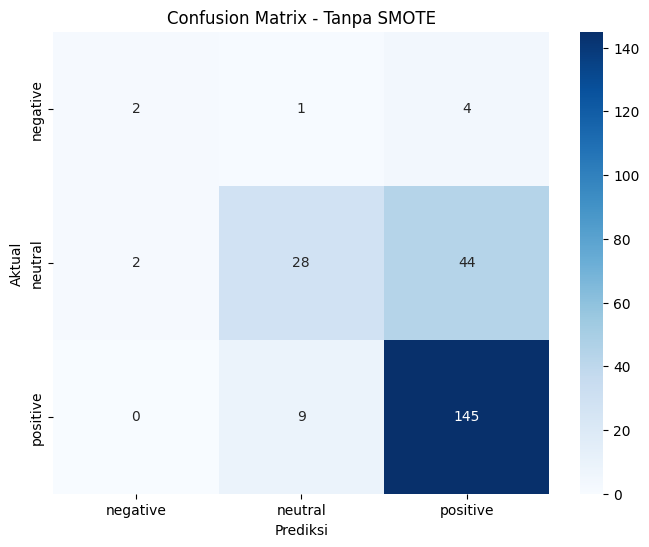

In [89]:
cm_no_smote = confusion_matrix(y_test, y_pred_no_smote)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_no_smote, annot=True, fmt='d', cmap='Blues', xticklabels=best_nb_model_no_smote.classes_, yticklabels=best_nb_model_no_smote.classes_)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - Tanpa SMOTE')
plt.show()

Evaluasi hasil

Terapkan SMOTE pada data latih

In [90]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Cek distribusi kelas sebelum dan sesudah SMOTE

In [93]:
print("Distribusi kelas sebelum SMOTE:", Counter(y_train))
print("Distribusi kelas setelah SMOTE:", Counter(y_train_resampled))

Distribusi kelas sebelum SMOTE: Counter({'positive': 616, 'neutral': 294, 'negative': 29})
Distribusi kelas setelah SMOTE: Counter({'positive': 616, 'neutral': 616, 'negative': 616})


Evaluasi hasil dengan SMOTE

In [94]:
grid_search_nb.fit(X_train_resampled, y_train_resampled)
best_nb_model_smote = grid_search_nb.best_estimator_
y_pred_smote = best_nb_model_smote.predict(X_test)
print("=== Laporan Klasifikasi (dengan SMOTE) ===")
print(classification_report(y_test, y_pred_smote))
print("Akurasi:", accuracy_score(y_test, y_pred_smote))

=== Laporan Klasifikasi (dengan SMOTE) ===
              precision    recall  f1-score   support

    negative       0.08      0.14      0.10         7
     neutral       0.89      0.46      0.61        74
    positive       0.79      0.94      0.86       154

    accuracy                           0.77       235
   macro avg       0.59      0.51      0.52       235
weighted avg       0.80      0.77      0.76       235

Akurasi: 0.7659574468085106


Confusion matrix dengan SMOTE

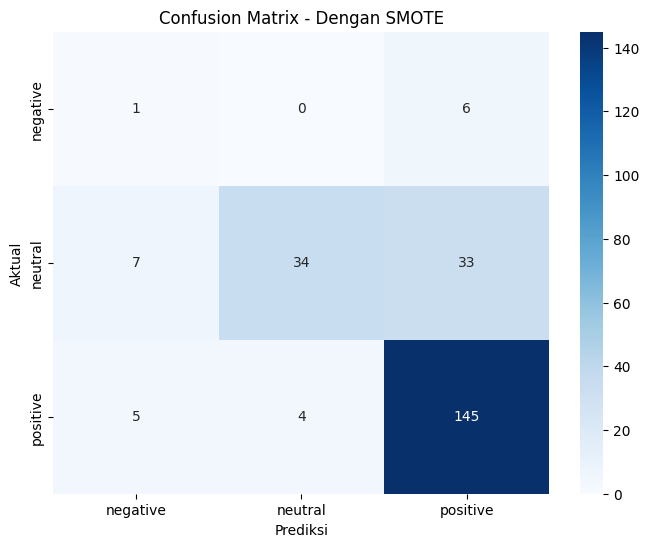

In [95]:
cm_smote = confusion_matrix(y_test, y_pred_smote)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Blues', xticklabels=best_nb_model_smote.classes_, yticklabels=best_nb_model_smote.classes_)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - Dengan SMOTE')
plt.show()

Hitung dan Visualisasi Precision, Recall, F1-score untuk Tanpa dan Dengan SMOTE

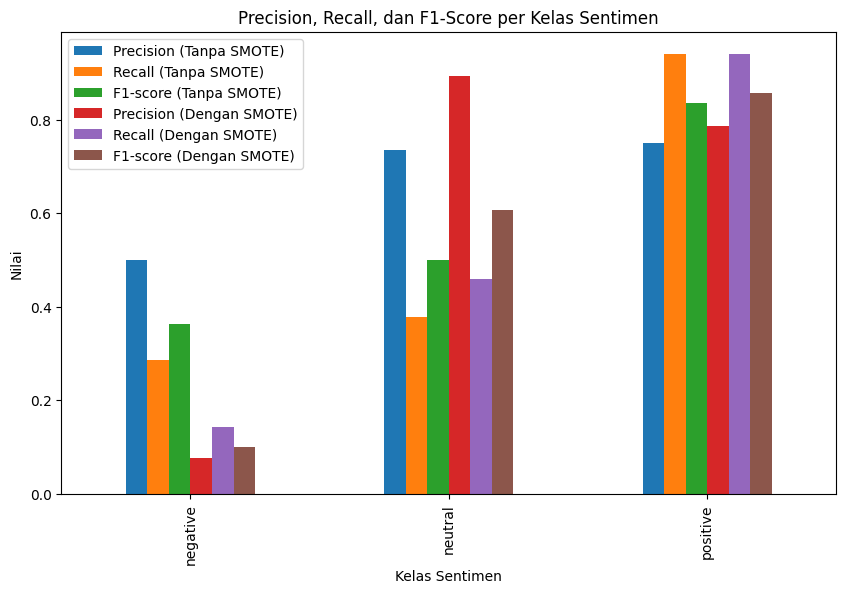

In [96]:
metrics_no_smote = precision_recall_fscore_support(y_test, y_pred_no_smote, average=None, labels=best_nb_model_no_smote.classes_)
metrics_smote = precision_recall_fscore_support(y_test, y_pred_smote, average=None, labels=best_nb_model_smote.classes_)

metric_df = pd.DataFrame({
    'Kelas Sentimen': best_nb_model_no_smote.classes_,
    'Precision (Tanpa SMOTE)': metrics_no_smote[0],
    'Recall (Tanpa SMOTE)': metrics_no_smote[1],
    'F1-score (Tanpa SMOTE)': metrics_no_smote[2],
    'Precision (Dengan SMOTE)': metrics_smote[0],
    'Recall (Dengan SMOTE)': metrics_smote[1],
    'F1-score (Dengan SMOTE)': metrics_smote[2]
})
metric_df.set_index('Kelas Sentimen').plot(kind='bar', figsize=(10, 6))
plt.title("Precision, Recall, dan F1-Score per Kelas Sentimen")
plt.ylabel("Nilai")
plt.show()

Distribusi Sentimen Bar Chart

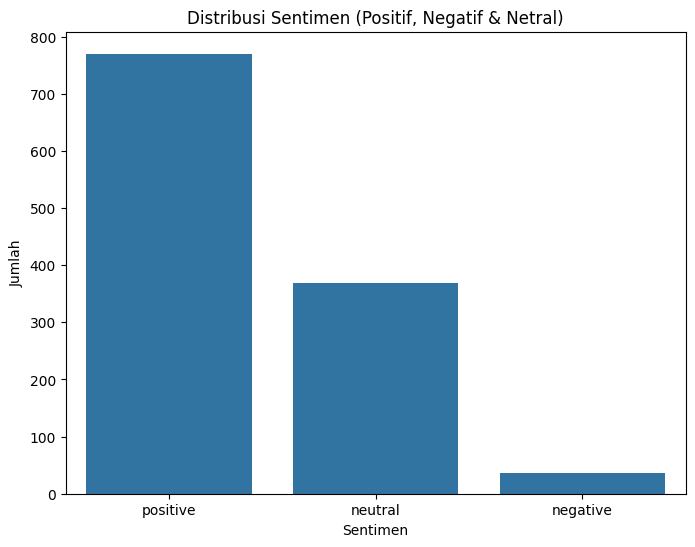

In [98]:
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Distribusi Sentimen (Positif, Negatif & Netral)')
plt.show()

Distribusi Sentimen Pie Chart

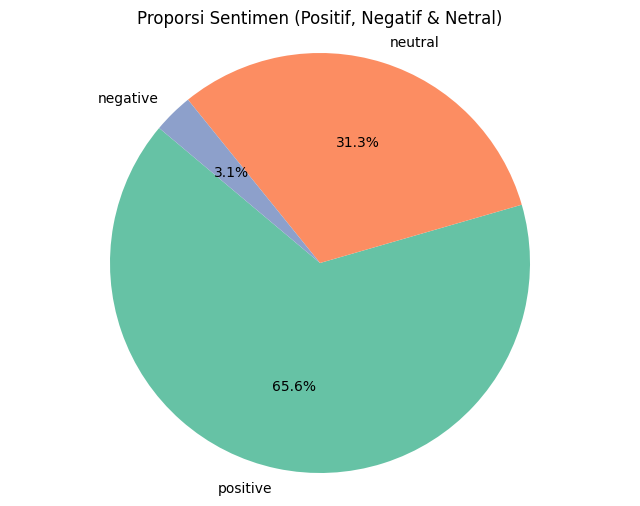

In [86]:
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.axis('equal')  # Agar pie chart menjadi bulat
plt.title('Proporsi Sentimen (Positif, Negatif & Netral)')
plt.show()

Wordcloud untuk ulasan positif

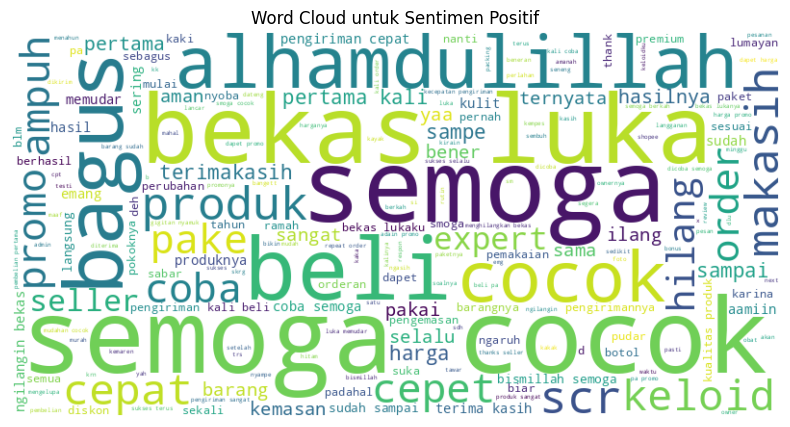

In [100]:
positif_text = ' '.join(df[df['sentiment'] == 'positive']['cleaned_content'])
wordcloud_positif = WordCloud(width=800, height=400, background_color='white').generate(positif_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positif, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud untuk Sentimen Positif')
plt.show()

Wordcloud untuk ulasan Negatif

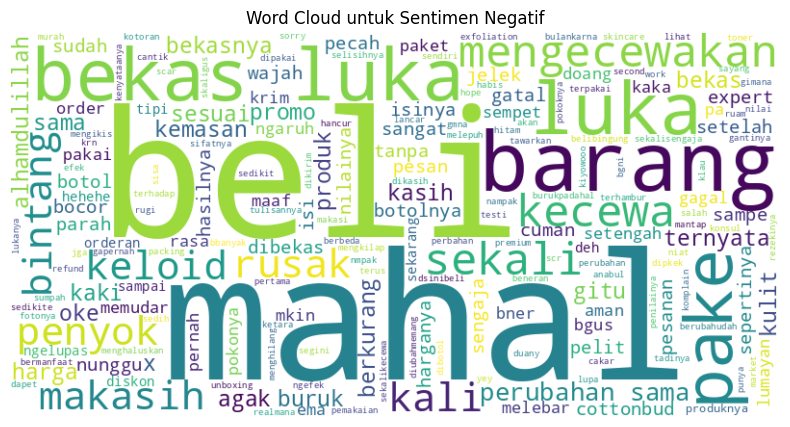

In [101]:
negatif_text = ' '.join(df[df['sentiment'] == 'negative']['cleaned_content'])
wordcloud_negatif = WordCloud(width=800, height=400, background_color='white').generate(negatif_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negatif, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud untuk Sentimen Negatif')
plt.show()

Wordcloud untuk ulasan netral

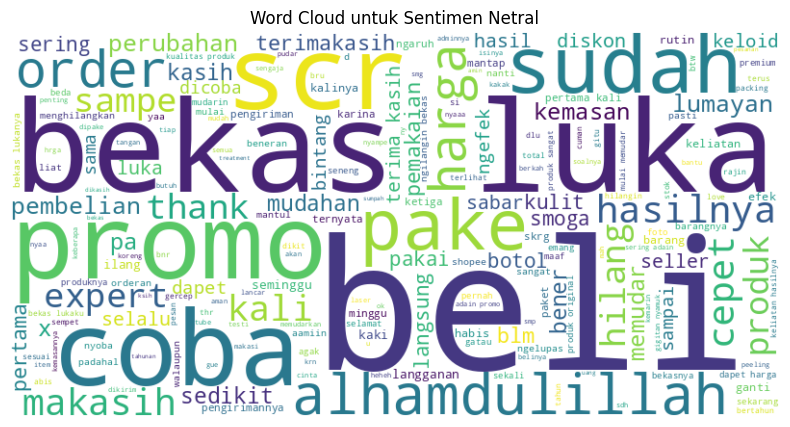

In [102]:
netral_text = ' '.join(df[df['sentiment'] == 'neutral']['cleaned_content'])
wordcloud_netral = WordCloud(width=800, height=400, background_color='white').generate(netral_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_netral, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud untuk Sentimen Netral')
plt.show()

Bar Plot Kata-Kata yang Paling Sering Muncul

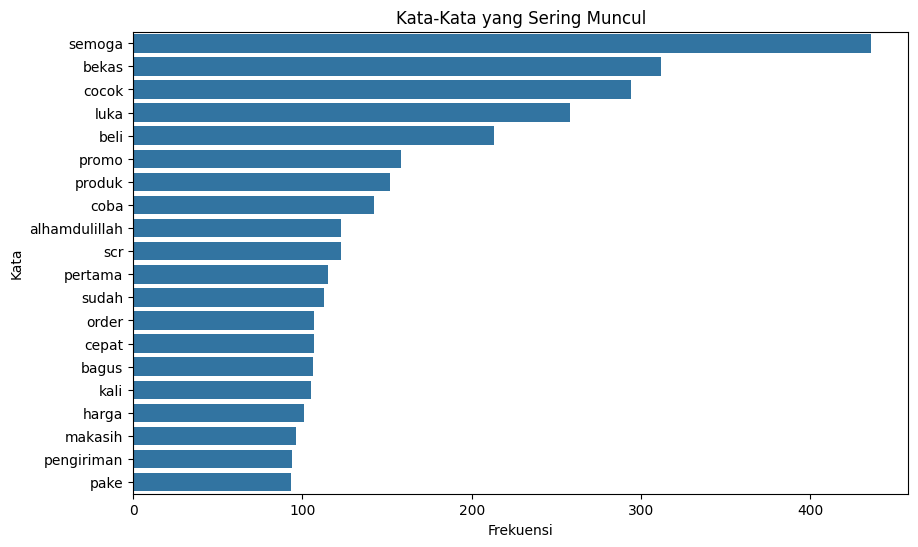

In [103]:
count_vectorizer = CountVectorizer(max_features=20)
word_counts = count_vectorizer.fit_transform(df['cleaned_content'])
word_counts_sum = word_counts.sum(axis=0)
words_freq = [(word, word_counts_sum[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
words_freq_df = pd.DataFrame(words_freq, columns=['Kata', 'Frekuensi'])

plt.figure(figsize=(10, 6))
sns.barplot(data=words_freq_df, x='Frekuensi', y='Kata')
plt.title("Kata-Kata yang Sering Muncul")
plt.xlabel("Frekuensi")
plt.ylabel("Kata")
plt.show()

Simpan model dan vectorizer untuk digunakan pada data baru

In [105]:
joblib.dump(best_nb_model_smote, 'model_naive_bayes_smote.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

Filter data yang belum diberi label (jika ada)

In [106]:
df_unlabeled = df[df['sentiment'].isna()]

Periksa apakah ada data tanpa label sebelum melakukan transformasi dan prediksi

In [107]:
if not df_unlabeled.empty:
    X_unlabeled = vectorizer.transform(df_unlabeled['cleaned_content'])
    df_unlabeled['predicted_sentiment'] = best_nb_model.predict(X_unlabeled)
    # Gabungkan data berlabel dan data yang diprediksi
    df_final = pd.concat([df, df_unlabeled], ignore_index=True)
else:
    print("Tidak ada data tanpa label yang perlu diprediksi.")
    df_final = df  # Jika tidak ada data tanpa label, langsung gunakan data asli

Tidak ada data tanpa label yang perlu diprediksi.


Simpan hasil prediksi ke file CSV

In [110]:
df_final.to_csv('hasil_prediksi_sentimen_nbsmote.csv', index=False)
print("Hasil prediksi sentimen telah disimpan dalam file 'hasil_prediksi_sentimen_nbsmote.csv'.")

Hasil prediksi sentimen telah disimpan dalam file 'hasil_prediksi_sentimen_nbsmote.csv'.
